In [2]:
library(dplyr, warn=FALSE)
#library(readr)
library(ggplot2)

In [3]:
combined_df = read.delim('data/combined.tsv', stringsAsFactors=FALSE)
#combined_df = readr::read_tsv('data/combined.tsv')
head(combined_df, 2)

,entrez_gene_id,symbol,node,metaedge,degree,snps_hh550,snps_ho1,degree_log,snps_hh550_log,snps_ho1_log
1,1,A1BG,gene::1,gene < overexpression downregulation < gene,0,4,12,0,0.69897,1.113943
2,1,A1BG,gene::1,gene - participation - molecular function,0,4,12,0,0.69897,1.113943
3,1,A1BG,gene::1,gene < knockdown downregulation < gene,0,4,12,0,0.69897,1.113943
4,1,A1BG,gene::1,gene > overexpression upregulation > gene,0,4,12,0,0.69897,1.113943
5,1,A1BG,gene::1,gene - expression - anatomy,19,4,12,1.30103,0.69897,1.113943
6,1,A1BG,gene::1,gene - upregulation - disease,0,4,12,0,0.69897,1.113943


In [103]:
metaedge_subset = c(
  #'gene - association - disease',
  'gene - function - disease',
  'gene - participation - molecular function',
  'gene - participation - cellular component',
  'gene - participation - pathway',
  'gene - expression - anatomy',
  'gene - interaction - gene',
  'gene - regulation - perturbation'
)

In [104]:
gg_base = function(gg) {
    gg = gg + 
      ggplot2::theme_bw() + 
      ggplot2::theme(strip.background=ggplot2::element_rect(fill='#FEF2E2')) +
      ggplot2::theme(plot.margin = grid::unit(c(2, 2, 2, 2), 'points'))
    return(gg)
}

In [105]:
log10p = function(x) {log10(1 + x)}
x_labels = round(10 ** seq(0, 3, 0.32) - 1) #c(0, 1, 3, 7, 15, 30, 100)

geom_smooth: method="auto" and size of largest group is >=1000, so using gam with formula: y ~ s(x, bs = "cs"). Use 'method = x' to change the smoothing method.


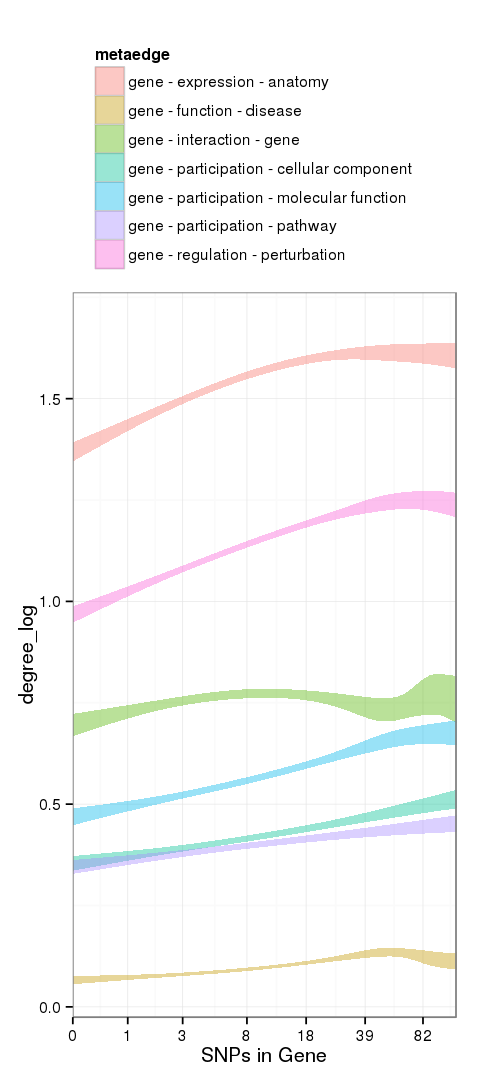

In [106]:
options(repr.plot.width=4, repr.plot.height = 9)
combined_df %>%
  dplyr::filter(metaedge %in% metaedge_subset) %>%
  ggplot2::ggplot(aes(x=snps_hh550_log, y=degree_log, fill=metaedge)) %>% gg_base() +
  ggplot2::theme_bw() +
  ggplot2::geom_smooth(linetype=0) +
  ggplot2::coord_cartesian(xlim=c(0, 2.1)) +
  ggplot2::theme(legend.position='top', legend.direction='vertical') +
  ggplot2::scale_x_continuous(breaks=log10p(x_labels), labels=x_labels, name='SNPs in Gene')

geom_smooth: method="auto" and size of largest group is >=1000, so using gam with formula: y ~ s(x, bs = "cs"). Use 'method = x' to change the smoothing method.


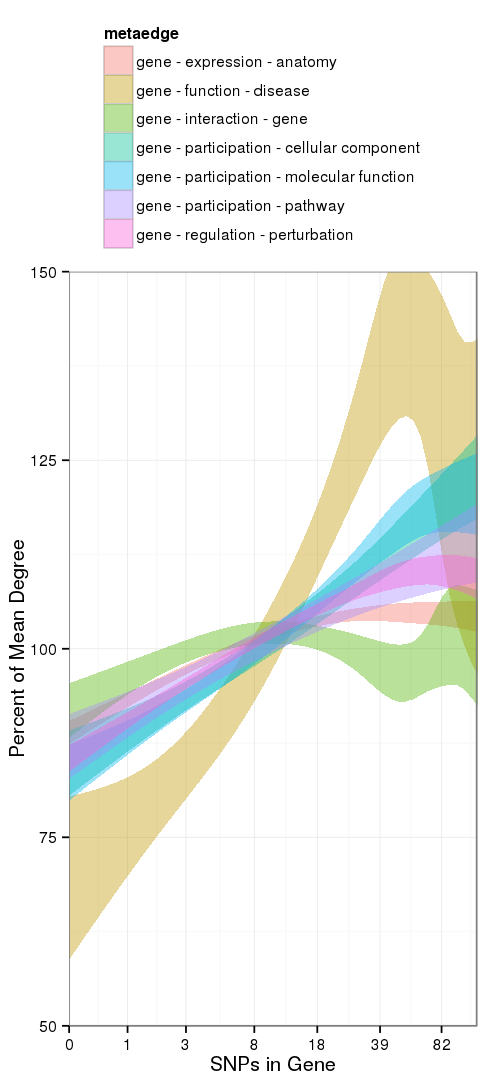

In [110]:
combined_df = combined_df %>%
  dplyr::group_by(metaedge) %>%
  dplyr::mutate(degree_percent = 100 * degree_log / mean(degree_log)) %>%
  dplyr::ungroup()

options(repr.plot.width=4, repr.plot.height = 9)
combined_df %>%
  dplyr::filter(metaedge %in% metaedge_subset) %>%
  ggplot2::ggplot(aes(x=snps_hh550_log, y=degree_percent, fill=metaedge)) %>% gg_base() +
  ggplot2::geom_smooth(linetype=0) +
  ggplot2::coord_cartesian(xlim=c(0, 2.1), ylim=c(50, 150)) +
  ggplot2::theme(legend.position='top', legend.direction='vertical') +
  ggplot2::scale_x_continuous(breaks=log10p(x_labels), labels=x_labels, name='SNPs in Gene') +
  ggplot2::ylab('Percent of Mean Degree')

geom_smooth: method="auto" and size of largest group is >=1000, so using gam with formula: y ~ s(x, bs = "cs"). Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is >=1000, so using gam with formula: y ~ s(x, bs = "cs"). Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is >=1000, so using gam with formula: y ~ s(x, bs = "cs"). Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is >=1000, so using gam with formula: y ~ s(x, bs = "cs"). Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is >=1000, so using gam with formula: y ~ s(x, bs = "cs"). Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is >=1000, so using gam with formula: y ~ s(x, bs = "cs"). Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and siz

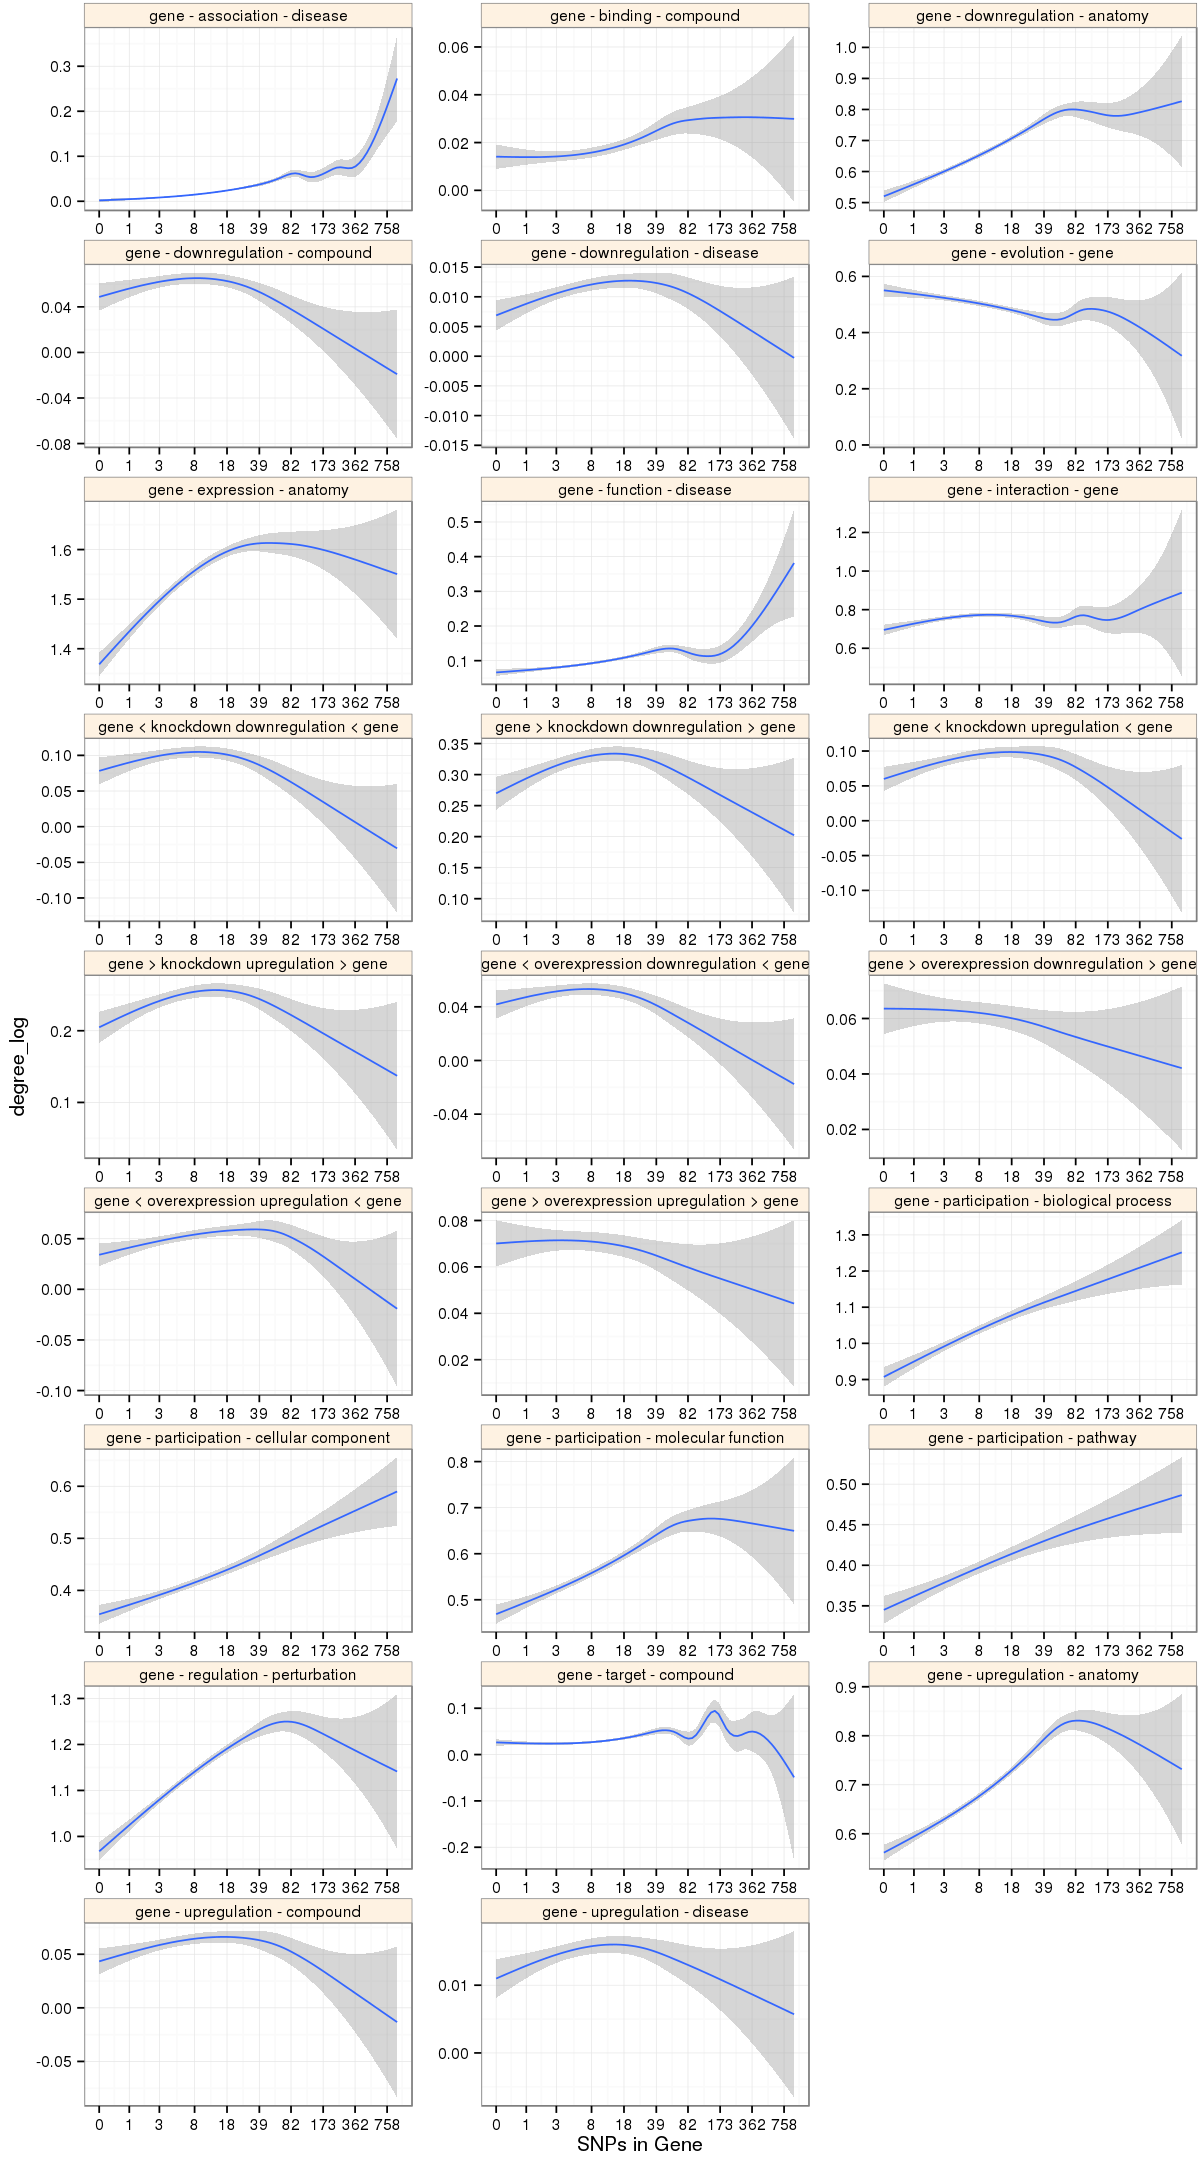

In [109]:
options(repr.plot.width=10, repr.plot.height=18)
combined_df %>% 
  ggplot2::ggplot(aes(x=snps_hh550_log, y=degree_log)) %>% gg_base() +
  ggplot2::facet_wrap(~ metaedge, ncol = 3, scales = 'free') +
  ggplot2::geom_smooth() +
  ggplot2::scale_x_continuous(breaks=log10p(x_labels), labels=x_labels, name='SNPs in Gene')